In [77]:
import requests
import pandas as pd

import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import yfinance as yf
import pandas_datareader as pdr

In [78]:
ticker = 'AAPL'
headers = {'User-Agent': 'Mozilla/5.0'}

tickersResponse = requests.get('https://www.sec.gov/files/company_tickers.json', headers=headers)
tickers = pd.DataFrame.from_dict(tickersResponse.json(), orient='index')
cik = str(tickers[tickers['ticker'] == ticker]['cik_str'][0]).zfill(10)

factsResponse = requests.get('https://data.sec.gov/api/xbrl/companyfacts/CIK' + cik + '.json', headers=headers)
concepts = []
for col1 in factsResponse.json()['facts'].keys():
    for col2 in factsResponse.json()['facts'][col1].keys():
        concept = '/' + col1 + '/' + col2 + '.json'
        concepts.append(concept)

conceptResponse = requests.get('https://data.sec.gov/api/xbrl/companyconcept/CIK' + cik + concepts[282], headers=headers)
CashOperExp = pd.DataFrame.from_dict(conceptResponse.json()['units']['USD'])
conceptResponse = requests.get('https://data.sec.gov/api/xbrl/companyconcept/CIK' + cik + concepts[361], headers=headers)
CapEx = pd.DataFrame.from_dict(conceptResponse.json()['units']['USD'])

In [79]:
CashOperExp['end'] = pd.to_datetime(CashOperExp['end'], format='%Y-%m-%d')
CapEx['end'] = pd.to_datetime(CapEx['end'], format='%Y-%m-%d')

In [80]:
CashOperExp = CashOperExp[CashOperExp['form'] == '10-K'].drop_duplicates(subset=['end']).set_index('end')['val']
CapEx = CapEx[CapEx['form'] == '10-K'].drop_duplicates(subset=['end']).set_index('end')['val']
FutCashFlow = CashOperExp.to_frame().join(CapEx.to_frame(), lsuffix='_CashOperExp', rsuffix='_CapEx')
FutCashFlow = (FutCashFlow['val_CashOperExp'] - FutCashFlow['val_CapEx']).dropna()

In [84]:
FutCashFlow

end
2013-09-28    4.550100e+10
2015-09-26    7.001900e+10
2016-09-24    5.309000e+10
2017-09-30    5.114700e+10
2018-09-29    6.412100e+10
2019-09-28    5.889600e+10
2020-09-26    7.336500e+10
2021-09-25    9.295300e+10
2022-09-24    1.114430e+11
dtype: float64

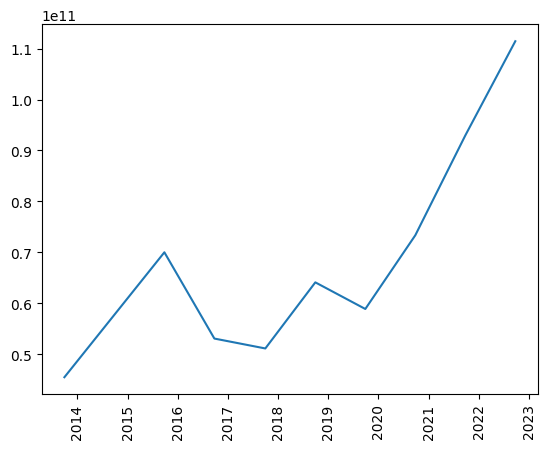

In [83]:
plt.plot(FutCashFlow)
plt.xticks(rotation=90)
plt.show()
